<a href="https://colab.research.google.com/github/jiaya12/JYang.github.io/blob/master/MTH786FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![QM.jpg](attachment:QM.jpg)

<table width=100%>
    <tr>
        <td width = 40% align = "left">
            <h3> MTH786 Machine Learning with Python</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Semester A, 2021/2022 </h3>
        </td>
    </tr>
    <tr>
        <td width = 40% align = "left">
            <h3> Final Project</h3>
        </td>
        <td width = 35%>            
        </td>
        <td width = 25% align = "left">
            <h3>Dr Mihail Poplavskyi</h3>
        </td>
    </tr>
</table>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` and that you delete any **raise NotImplementedError()** once you have filled in your code. Enter your name and student identifier below:

In [ ]:
StudentName = "Guowen Ji"

In [ ]:
StudentID = 210166275

<div class="alert alert-block alert-danger">
Please fill the student ID above as it is used for hidden tests generation. Please fill your student name as well.
</div>

# Sound classification techniques

This is the coding template for the final assessment of MTH786U/P in Semester A of 2021/2022.

The goal of this assessment is to classify audio files by using different sound features and to present your results in a written report (at most $8$ pages). The assessment is formed of three parts: 
1) filling in the missing parts of this Jupyter notebook,   
2) applying learned concepts from this notebook and the module MTH786 in general to the Audio MNIST classification problem, and   
3) presenting your results in a written report (written in $\LaTeX$).

Follow the instructions in this template in order to complete the first part of your assessment. Please only modify cells where you are instructed to do so.
Use the available cells to introduce the code. You can add additional cells if needed, without amending the template structure: don't remove, split, move existing cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. We load the Numpy and Matplotlib libraries. Please do not add any additional libraries if not instructed to do so. Save this Jupyter Notebook with the name **MTH786FinalProject.ipynb**. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Spotify music classification


For the first part of your final assessment you are required to implement the logistic regression model for binary classification problems as introduced in the lectures. Following up on what you have learned in the lectures and tutorials, complete the following tasks.

### Question 1a [7 marks]
Write a function $\mathtt{linear\_model\_function}$ that implements a linear model function for binary logistic regression defined as:
$$
f\left(\mathbf{x}, \mathbf{w}\right)
= \left\langle \phi\left(\mathbf{x}\right),\mathbf{w}\right\rangle,
$$
where $\phi\left(\mathbf{x}\right)$ is an augmented data vector and $\mathbf{w}$ is a weight vector. Your function should take two arguments: 
- *data_matrix*: two-dimensional NumPy array containing augmented data row-vectors for corresponding data samples;
- *weights*: weights column-vector.

The function should output a column-vector of the model function values for corresponding data samples.

In [ ]:
def linear_model_function(data_matrix, weights):
    # YOUR CODE HERE
    return data_matrix @ weights
    raise NotImplementedError()

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [ ]:
test_data_matrix = np.array([[1, -0.15771414, -0.75293918, -0.0130713],\
                             [1, -0.3521762, 0.19650084, 1.94050566],\
                             [1, 1.30917135,  1.69791787, -0.91502836]])
test_weights = np.array([[0.46390948], [-1.15729779], [0.23372497],
                         [-1.5223521]])
test_model_function_values = np.array([[0.4903501], [-2.0367235], [0.7386495]])
np.testing.assert_almost_equal(
    linear_model_function(test_data_matrix, test_weights),
    test_model_function_values)

In [ ]:
#HIDDEN TEST


For the next exercise, write a function $\mathtt{binary\_logistic\_activation\_function}$ that takes an argument named *inputs* and returns the output of the sigmoid function
$$
\sigma\left(\mathbf{x}\right) = \frac{1}{1+\mathrm{e}^{-\mathbf{x}}}.
$$ 
applied to the NumPy array *input*. Here $\mathbf{x}$ is the mathematical notation for the argument *input*. The function should return NumPy array of the same shape as the *input*.

In [ ]:
def binary_logistic_activation_function(inputs):
    # YOUR CODE HERE
    sigmoid = 1/(1+np.exp(-inputs))
    return sigmoid
    raise NotImplementedError()

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [ ]:
test_row_inputs = np.array([0, 1, -3, np.log(2), 0.4223615])
test_row_outputs = np.array([0.5, 0.7310586, 0.0474259, 0.6666667, 0.6040482])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_row_inputs), test_row_outputs)

In [ ]:
test_column_inputs = np.array([[-2], [0.5], [np.log(1 / 3)], [0.26478703]])
test_column_outputs = np.array([[0.1192029], [0.6224593], [0.25], [0.5658127]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_column_inputs),
    test_column_outputs)

In [ ]:
test_matrix_inputs = np.array([[2, np.log(1 / 2)], [0.26478703, np.sin(1)]])
test_matrix_outputs = np.array([[0.8807971, 1 / 3], [0.5658127, 0.6987749]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_matrix_inputs),
    test_matrix_outputs)

Write two functions $\mathtt{binary\_logistic\_prediction\_function}$ and $\mathtt{classification\_accuracy}$ that turn your predictions into classification results and that compare how many labels have been classified correctly. The function $\mathtt{binary\_logistic\_prediction\_function}$ takes the argument *logistic_values* as inputs and returns a vector of class labels with binary values in $\left\{0, 1\right\}$ as its output. The function $\mathtt{classification\_accuracy}$ takes two inputs *true_labels* and *recovered_labels* and returns the percentage of
correctly classified labels divided by $100$.

In [ ]:
def binary_logistic_prediction_function(logistic_values):
    # YOUR CODE HERE
    return logistic_values>1/2
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_logistic_values = np.array([[0.30493025], [0.80419595], [0.56509748], [0.23903961],\
                                 [0.9773376],  [0.28956517], [0.83508464], [0.57761601],\
                                 [0.41169655], [0.97455507], [0.1095421],  [0.21852319]])
test_class_labels = np.array([[0], [1], [1], [0],\
                              [1], [0], [1], [1],\
                              [0], [1], [0], [0]])
np.testing.assert_array_almost_equal(
    binary_logistic_prediction_function(test_logistic_values),
    test_class_labels)

In [ ]:
def classification_accuracy(true_labels, recovered_labels):
    # YOUR CODE HERE
    if true_labels.size != recovered_labels.size:
        return False
    num_correct = 0
    for i in range(true_labels.size):
        if true_labels[i] == recovered_labels[i]:
            num_correct += 1
    acc = num_correct/true_labels.size
    return acc
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_true_labels = np.array([[0], [1], [1], [0], [1], [1], [0], [0], [1], [0]])
test_recovered_labels = np.array([[1], [1], [0], [0], [0], [1], [1], [0], [1],
                                  [1]])
np.testing.assert_almost_equal(
    classification_accuracy(test_true_labels, test_recovered_labels), 0.5)

### Question 1b [5 marks]
Write two functions that implement the cost function for binary logistic regression as well as its gradient, as defined below. $$
\mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(\sum\limits_{i=1}^s
\log\left[1+\exp\left(f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right)\right] - y_i\cdot f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right),
$$
where $\phi\left(\mathbf{x}^{(i)}\right)$ is an augmented $i$-th data vector and $f$ is a model function. In the case of linear model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ one has 
$$
\nabla \mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \phi\left(\mathbf{x}^{(i)}\right)\cdot\sigma
  \left(\left\langle \phi\left(\mathbf{x}^{(i)}\right),\mathbf{w} \right\rangle \right) - y_i\cdot \phi\left(\mathbf{x}^{(i)}\right)
  \right),
$$
where $y_i$ are the corresponding data labels. 

The cost function is should be called $\mathtt{binary\_logistic\_regression\_cost\_function}$ and should take the NumPy arrays *data_matrix*, *data_labels* and
*weights* as arguments. Subsequently, write a method $\mathtt{binary\_logistic\_regression\_gradient}$ that takes the same inputs as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and
computes the gradient of the binary logistic regression cost function as defined in the lecture.

### Question 1b [5 marks]
Write two functions that implement the cost function for binary logistic regression as well as its gradient, as defined below. $$
\mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(\sum\limits_{i=1}^s
\log\left[1+\exp\left(f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right)\right] - y_i\cdot f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right),
$$
where $\phi\left(\mathbf{x}^{(i)}\right)$ is an augmented $i$-th data vector and $f$ is a model function. In the case of linear model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ one has 
$$
\nabla \mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \phi\left(\mathbf{x}^{(i)}\right)\cdot\sigma
  \left(\left\langle \phi\left(\mathbf{x}^{(i)}\right),\mathbf{w} \right\rangle \right) - y_i\cdot \phi\left(\mathbf{x}^{(i)}\right)
  \right),
$$
where $y_i$ are the corresponding data labels. 

The cost function is should be called $\mathtt{binary\_logistic\_regression\_cost\_function}$ and should take the NumPy arrays *data_matrix*, *data_labels* and
*weights* as arguments. Subsequently, write a method $\mathtt{binary\_logistic\_regression\_gradient}$ that takes the same inputs as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and
computes the gradient of the binary logistic regression cost function as defined in the lecture.

In [ ]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,
                                             weights):
    # YOUR CODE HERE
    f = np.dot(data_matrix, weights)
    loss = np.log(1+np.exp(f))-np.multiply(data_labels, f)
    loss = np.mean(loss)
    return loss
    raise NotImplementedError()

In [ ]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    # YOUR CODE HERE
    grad = np.zeros(weights.T.shape)
    for i in range(data_matrix.shape[0]):
        data = data_matrix[i,:]
        sigmoid = 1/(1+np.exp(-np.dot(data,weights)))
        grad += np.multiply(data,(sigmoid-data_labels[i]))
        
    grad = grad/data_matrix.shape[0]
    return np.transpose(grad)
    raise NotImplementedError()

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [ ]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_cost_function(data_matrix=test_data_matrix,
                                             data_labels=test_data_labels,
                                             weights=test_weights), 0.846796)

In [ ]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_gradient = np.array([[-0.006401], [0.150453], [0.074496], [-0.120697]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_gradient(data_matrix=test_data_matrix,
                                        data_labels=test_data_labels,
                                        weights=test_weights), test_gradient)

After writing Python functions for the binary logistic regression cost function and its gradient, fill in the following notebook functions for the implementation of a gradient descent method. For the
first function it is acceptable to follow the solution presented in the class assignments, or to use your own version if is consistent with function header and output. For the second gradient descent function named $\mathtt{gradient\_descent\_v2}$, modify the gradient descent method to include a stopping criterion that ensures that gradient descent stops once
$$
\left\| \nabla L\left(\mathbf{w}^{(k)}\right)\right\|_2 \leq \mathrm{tolerance},
$$
is satisfied. Here $L$ and $\mathbf{w}^{(k)}$ are the mathematical representations of the objective $\mathrm{objective}$ and the weight vector *weights*, at iteration *k*. The parameter *tolerance* is a non-negative threshold
that controls the Euclidean norm of the gradient. The function $\mathtt{gradient\_descent\_v2}$ takes the arguments $\mathtt{objective}$, $\mathtt{gradient}$, *initial_weights*, *step_size*, *no_of_iterations*, *print_output* and
*tolerance*. The arguments $\mathtt{objective}$ and $\mathtt{gradient}$ are functions that can take (weight-)arrays as arguments and return the scalar value of the objective, respectively the array representation of the corresponding gradient. The argument *initial_weights* specifies the initial value of the variable over which you iterate. The argument *step_size* is the gradient descent step-size parameter, the argument *no_of_iterations* specifies the maximum number of iterations, *print_output* determines after how many iterations the function produces a text output and *tolerance* controls the norm of the gradient as described in the equation above. Both functions should return the last value of iteration variable (*weights*) together with the values of objective function evaluated at every iteration step.

In [ ]:
def gradient_descent(objective,
                     gradient,
                     initial_weights,
                     step_size=1,
                     no_of_iterations=100,
                     print_output=10):
    # YOUR CODE HERE
    weight = initial_weights
    i = 0
    costs = []
    while True:
        weight = weight - np.dot(step_size,gradient(weight))
        costs.append(objective(weight))
        if i%print_output == 0:
            print('The objective function is: ', objective(weight))
        i += 1 
        if i>no_of_iterations:
            break
    return weight,costs
    raise NotImplementedError()

In [ ]:
def gradient_descent_v2(objective, gradient, initial_weights, \
                        step_size=1, no_of_iterations=100, print_output=10, tolerance=1e-6):
    # YOUR CODE HERE
    weight = initial_weights
    i = 0
    costs = []
    costs.append(objective(weight))
    while True:
        weight = weight - np.dot(step_size,gradient(weight))
        costs.append(objective(weight))
        if i%print_output == 0:
            print('The objective function is: ', objective(weight))
        if i>no_of_iterations or np.linalg.norm(gradient(weight))<tolerance:
            break
        else:
            i +=1
#     print(weight)
    return weight,costs
    raise NotImplementedError()

In [ ]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[0],\
                          np.array([-0.564103, -0.538462]))

The objective function is:  -2.9328529573465416
The objective function is:  -3.025632392529566
The objective function is:  -3.0256410215452108
The objective function is:  -3.025641025639083
The objective function is:  -3.0256410256410247
The objective function is:  -3.0256410256410255
The objective function is:  -3.0256410256410255
The objective function is:  -3.0256410256410255
The objective function is:  -3.025641025641026
The objective function is:  -3.0256410256410255
The objective function is:  -3.0256410256410255


In [ ]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(len(gradient_descent_v2(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[1])-1,\
                          35) ### the iteration should stop after 35 steps

The objective function is:  -2.9328529573465416
The objective function is:  -3.025632392529566
The objective function is:  -3.0256410215452108
The objective function is:  -3.025641025639083


### Question 1c [7 marks]
We proceed by testing your implementation on the [Spotify(c)](https://www.spotify.com/) music dataset. You are asked to analyse the data collected by Brice Vergnou on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation). Please take a look at the corresponding webpage in case you want to know more about the data. The dataset consists of $150$ songs (randomly selected from $195$ available on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation)). The testing set consists of the rest $45$ songs. Each song is characterised by $13$ numbers representing
- $\mathtt{acousticness}$ : A confidence measure from $0.0$ to $1.0$ of whether the track is acoustic. $1.0$ represents high confidence the track is acoustic.
- $\mathtt{danceability}$ : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of $0.0$ is least danceable and $1.0$ is most danceable.
- $\mathtt{duration\_ms}$ : The duration of the track in milliseconds.
- $\mathtt{energy}$ : Energy is a measure from $0.0$ to $1.0$ and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- $\mathtt{instrumentalness}$ : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to $1.0$, the greater likelihood the track contains no vocal content. Values above $0.5$ are intended to represent instrumental tracks, but confidence is higher as the value approaches $1.0$.
- $\mathtt{key}$ : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. $0 = C$, $1 = C\sharp/D\flat$, $2 = D$, and so on.
- $\mathtt{liveness}$ : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above $0.8$ provides strong likelihood that the track is live.
- $\mathtt{loudness}$ : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between $-60$ and $0$ db.
- $\mathtt{mode}$ : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by $1$ and minor is $0$.
- $\mathtt{speechiness}$ : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to $1.0$ the attribute value. Values above $0.66$ describe tracks that are probably made entirely of spoken words. Values between $0.33$ and $0.66$ describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below $0.33$ most likely represent music and other non-speech-like tracks.
- $\mathtt{tempo}$ : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- $\mathtt{time\_signature}$ : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- $\mathtt{valence}$ : A measure from $0.0$ to $1.0$ describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Every song included in the training set is also assigned with the binary ($0$ or $1$) variable that provides an information on the dataset author's music preferences. 

The code in the following cell 
- loads and stores the training and testing dataset into corresponding NumPy arrays: *spotify_training_data_input*, *spotify_training_data_labels*, *spotify_testing_data_input*.

In [ ]:
spotify_training_data = np.genfromtxt('spotify_training.csv',
                                      skip_header=True,
                                      dtype=None,
                                      delimiter=',')
spotify_testing_data_input = np.genfromtxt('spotify_testing.csv',
                                           skip_header=True,
                                           dtype=None,
                                           delimiter=',')
spotify_training_data_input = spotify_training_data[:, :-1]
spotify_training_data_labels = spotify_training_data[:, -1].reshape(-1, 1)

In [ ]:
spotify_training_data = np.genfromtxt('spotify_training.csv',
                                      skip_header=True,
                                      dtype=None,
                                      delimiter=',')
spotify_testing_data_input = np.genfromtxt('spotify_testing.csv',
                                           skip_header=True,
                                           dtype=None,
                                           delimiter=',')
spotify_training_data_input = spotify_training_data[:, :-1]
spotify_training_data_labels = spotify_training_data[:, -1].reshape(-1, 1)

In the following cell, write a function $\mathtt{standardise}$ that standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should return a triple: the normalised matrix, the row of column averages and the row of column standard deviations.

In [ ]:
def standardise(data_matrix):
    # YOUR CODE HERE
    mean =  np.mean(data_matrix, axis=0)
    std = np.sqrt(np.mean(np.power(data_matrix-mean,2), axis=0))
    
    standrise = (data_matrix-mean)/std
    return standrise, mean, std
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_data_matrix = np.array([[1, 2], [3, 4], [5, 6]])
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[0],
    np.array([[-1.22474487, -1.22474487], [0, 0], [1.22474487, 1.22474487]]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[1], np.array([3, 4]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[2],
    np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)]))

Now write a function $\mathtt{de\_standardise}$ that de-standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should take three NumPy array: *standardised_matrix*, *row_of_means*, *row_of_stds* and reconstruct the original matrix used  to obtain a standardised one.

In [ ]:
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    # YOUR CODE HERE
    origin = np.multiply(standardised_matrix,row_of_stds)
    origin = origin+row_of_means
    return origin
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_standardised_matrix = np.array([[-1.22474487, -1.22474487], [0, 0],
                                     [1.22474487, 1.22474487]])
test_row_of_means = np.array([3, 4])
test_row_of_stds = np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)])
np.testing.assert_array_almost_equal(
    de_standardise(test_standardised_matrix, test_row_of_means,
                   test_row_of_stds), np.array([[1, 2], [3, 4], [5, 6]]))

Apply data standardisation as per above to the Spotify data, both training and testing.

In [ ]:
spotify_training_data_input, spotify_row_of_avgs, spotify_row_of_stds = standardise(
    spotify_training_data_input)
spotify_testing_data_input = (spotify_testing_data_input -
                              spotify_row_of_avgs) / spotify_row_of_stds

In order to prepare our normalised data for a data analysis we also need to build an augmented data matrix. Implement function $\mathtt{linear\_regression\_data}$ that computes (and outputs) the linear regression *data_matrix* for a given *data_inputs* matrix.

In [ ]:
def linear_regression_data(data_inputs):
    # YOUR CODE HERE
    data = []
    for i in range(data_inputs.shape[0]):
        key = list(data_inputs[i])
        key.insert(0,1)
        
        data.append(key)
    return np.array(data)
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_data_inputs = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
np.testing.assert_array_equal(
    linear_regression_data(test_data_inputs),
    np.array([[1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5]]))

You are now asked to apply the above to the Spotify dataset:
- Define a linear regression data matrix corresponding to Spotify training data. Store the matrix as *spotify_training_data_matrix*;
- Define an objective lambda function $\mathtt{spotify\_objective}$ with the argument *weights* based on the $\mathtt{binary\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *spotify_training_data_matrix*) and *data_labels* (equal to *spotify_training_data_labels*). Repeat the same exercise to create a function $\mathtt{spotify\_gradient}$ based on $\mathtt{binary\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero column-vector of appropriate length and store it as *spotify_initial_weights*;
- Define the step-size of gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *spotify_training_data_matrix*. Store it as *spotify_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-2*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *spotify_optimal_weights*, *spotify_objective_values*.


In [ ]:
# YOUR CODE HERE
spotify_training_data_matrix = linear_regression_data(spotify_training_data_input)

size = spotify_training_data_matrix.shape[1]
num_obs = spotify_training_data_matrix.shape[0]
spotify_initial_weights = np.zeros((size,1))

ones = np.ones((1,num_obs))
objective = lambda x: (ones @ (np.log(np.exp(spotify_training_data_matrix @ x)+1)) - \
               np.dot(spotify_training_data_labels.T,spotify_training_data_matrix) @ x)/num_obs


gradient = lambda x: (spotify_training_data_matrix.T @ binary_logistic_activation_function(spotify_training_data_matrix @ x) - \
               spotify_training_data_matrix.T @ spotify_training_data_labels)/num_obs

step_size = 1/(np.linalg.norm(spotify_training_data_matrix)**2/(3.9*len(spotify_training_data_matrix)))


spotify_optimal_weights, spotify_objective_values = gradient_descent_v2(objective, gradient, spotify_initial_weights, \
                    step_size, no_of_iterations=1000, print_output=100, tolerance=1e-2)
spotify_optimal_weights
# raise NotImplementedError()

The objective function is:  [[0.58724662]]
The objective function is:  [[0.22305813]]
The objective function is:  [[0.20285044]]
The objective function is:  [[0.19276678]]
The objective function is:  [[0.18626271]]
The objective function is:  [[0.18167402]]
The objective function is:  [[0.17827635]]


array([[-1.29646411],
       [ 1.63631427],
       [ 0.19574476],
       [-0.22493942],
       [ 2.55021477],
       [ 0.06314623],
       [ 1.07931859],
       [ 0.28767344],
       [-1.44998303],
       [ 0.271802  ],
       [-0.44153896],
       [ 0.75870886],
       [-2.35384176],
       [ 0.66464042]])

Let us now evaluate the classification accuracy.

In [ ]:
# YOUR CODE HERE
logis = 1/(np.exp(-np.dot(spotify_training_data_matrix, spotify_optimal_weights))+1)
pred = []
for i in logis:
    if i>0.5:
        pred.append([1])
    else:
        pred.append([0])
pred = np.array(pred)

acc = classification_accuracy(spotify_training_data_labels, pred)
spotify_classification_accuracy = acc
# raise NotImplementedError()

The correct classification accuracy is awarded **1 mark** as well as the correct weights vector.

In [ ]:
np.testing.assert_array_almost_equal(spotify_classification_accuracy,
                                     139 / 150)

In [ ]:
np.testing.assert_array_almost_equal(spotify_optimal_weights, np.array([[-1.29646411], [ 1.63631427], [ 0.19574476],\
                                                                        [-0.22493942], [ 2.55021477], [ 0.06314623],\
                                                                        [ 1.07931859], [ 0.28767344], [-1.44998303],\
                                                                        [ 0.271802  ], [-0.44153896], [ 0.75870886],\
                                                                        [-2.35384176], [ 0.66464042]]))

In the next hidden cell your model would be tested against the training data. The correct result is awarded **2 marks**.

In [ ]:
### HIDDEN TEST (running binary logistic regression on a training set)

### BEGIN HIDDEN TEST
spotify_testing_true_labels = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,\
                                        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,\
                                        0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]).reshape(-1,1)
spotify_testing_data_matrix = linear_regression_data(
    spotify_testing_data_input)
spotify_testing_regression_values = linear_model_function(
    spotify_testing_data_matrix, spotify_optimal_weights)
spotify_testing_predicted_labels = binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_testing_regression_values))
np.testing.assert_almost_equal(classification_accuracy(true_labels=spotify_testing_true_labels,\
                                                         recovered_labels=spotify_testing_predicted_labels), 42/45)
### END HIDDEN TEST

### Question 1d [7 marks]
In this section we attempt to increase the classification accuracy by considering the ridge binary logistic regression. 

Define two functions $\mathtt{ridge\_binary\_logistic\_regression\_cost\_function}$ and $\mathtt{ridge\_binary\_logistic\_regression\_gradient}$ that take $4$ arguments: the NumPy arrays *data_matrix*, *data_labels* and *weights*, and a positive float number *regularisation_parameter*. The modified cost function is defined as
$$
\mathrm{L}_{\alpha}\left(\mathbf{w}\right) = \mathrm{L}\left(\mathbf{w}\right) + \frac{\alpha}{2}\left\|\mathbf{w}\right\|^2,
$$
where $\mathrm{L}\left(\mathbf{w}\right)$ is a cost function for the binary logistic regression defined above, while the gradient function correspondingly is given by
$$
\nabla \mathrm{L}_{\alpha}\left(\mathbf{w}\right) = 
\nabla \mathrm{L}\left(\mathbf{w}\right) + \alpha \mathbf{w},
$$
where $\alpha$ is a mathematical representation of the *regularisation_parameter*.

In [ ]:
def ridge_binary_logistic_regression_cost_function(data_matrix, data_labels,
                                                   weights,
                                                   regularisation_parameter):
    # YOUR CODE HERE
    f = np.dot(data_matrix, weights)
    cost = np.log(1+np.exp(f))-np.multiply(data_labels, f)
    cost = np.mean(cost)+regularisation_parameter/2*np.power(np.linalg.norm(weights),2)
    return cost
    raise NotImplementedError()

In [ ]:
def ridge_binary_logistic_regression_gradient(data_matrix, data_labels,
                                              weights,
                                              regularisation_parameter):
    
    # YOUR CODE HERE
    grad = np.zeros(weights.T.shape)
    for i in range(data_matrix.shape[0]):
        data = data_matrix[i,:]
        sigmoid = 1/(1+np.exp(-np.dot(data,weights)))
        grad += np.multiply(data,(sigmoid-data_labels[i]))
        
    grad = grad/data_matrix.shape[0] + regularisation_parameter*weights.T
    return np.transpose(grad)
    raise NotImplementedError()

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [ ]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
regularisation_parameter = 1
np.testing.assert_array_almost_equal(
    ridge_binary_logistic_regression_cost_function(
        data_matrix=test_data_matrix,
        data_labels=test_data_labels,
        weights=test_weights,
        regularisation_parameter=regularisation_parameter), 1.304991)

In [ ]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
regularisation_parameter = 1
test_gradient = np.array([[-0.111815], [0.728467], [0.746135], [-0.467219]])
np.testing.assert_array_almost_equal(
    ridge_binary_logistic_regression_gradient(
        data_matrix=test_data_matrix,
        data_labels=test_data_labels,
        weights=test_weights,
        regularisation_parameter=regularisation_parameter), test_gradient)

Write a function $\mathtt{grid\_search}$ that performs a search for a minimum value of a given function on a given grid points. You function should take two parameters 
- *objective* - a lambda-function to minimise taking one argument;
- *grid* - is a list of grid points
The function should return the grid point with the minimal value of objective function.

In [ ]:
def grid_search(objective, grid):
    # YOUR CODE HERE
    min_point = grid[0]
    min_value = objective(min_point)
    for point in grid:
        value = objective(point)
        if value<min_value:
            min_point = point
            min_value = value
        else:
            continue
    return min_point
    raise NotImplementedError()

Test your functions with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
test_objective = lambda x: x[0]**2 - 2 * x[0] * x[1] + 2 * x[1]**2 + x[
    0] - 3 * x[1]
test_grid = [(x, y) for x in range(5) for y in range(5)]
np.testing.assert_almost_equal(grid_search(test_objective, test_grid), (0, 1))

You are now asked to run the below code to find the optimal value of a hyperparameter *regularisation_parameter* and then find the *spotify_optimal_weights* corresponding to the value of the hyperparameter.

In [ ]:
spotify_regularisation_parameter_grid = np.arange(0, .1, 0.01)

spotify_validation_error = lambda regularisation_parameter: 1-classification_accuracy(spotify_training_data_labels,\
                    binary_logistic_prediction_function(
                    binary_logistic_activation_function(
                    linear_model_function(spotify_training_data_matrix,
                    gradient_descent_v2(
                    objective = lambda weights: ridge_binary_logistic_regression_cost_function(
                                spotify_training_data_matrix,
                                spotify_training_data_labels,
                                weights,
                                regularisation_parameter),
                    gradient = lambda weights: ridge_binary_logistic_regression_gradient(
                                spotify_training_data_matrix,
                                spotify_training_data_labels,
                                weights,
                                regularisation_parameter),
                    initial_weights = np.zeros(shape = (spotify_training_data_matrix.shape[1], 1)),
                    step_size = 1/(np.linalg.norm(spotify_training_data_matrix)**2/(3.9*len(spotify_training_data_matrix))+regularisation_parameter),
                    no_of_iterations = 2000,
                    print_output = 2001,
                    tolerance = 1e-5
                    )[0]))))

spotify_optimal_regularisation_parameter = grid_search(
    spotify_validation_error, spotify_regularisation_parameter_grid)

spotify_optimal_weights = gradient_descent_v2(
    objective=lambda weights: ridge_binary_logistic_regression_cost_function(
        spotify_training_data_matrix, spotify_training_data_labels, weights,
        spotify_optimal_regularisation_parameter),
    gradient=lambda weights: ridge_binary_logistic_regression_gradient(
        spotify_training_data_matrix, spotify_training_data_labels, weights,
        spotify_optimal_regularisation_parameter),
    initial_weights=np.zeros(shape=(spotify_training_data_matrix.shape[1], 1)),
    step_size=1 /
    (np.linalg.norm(spotify_training_data_matrix)**2 /
     (3.9 * len(spotify_training_data_matrix)) + regularisation_parameter),
    no_of_iterations=2000,
    print_output=2001,
    tolerance=1e-5)[0]

spotify_training_regression_values = linear_model_function(
    spotify_training_data_matrix, spotify_optimal_weights)
spotify_training_predicted_labels = binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_training_regression_values))
spotify_classification_accuracy = classification_accuracy(true_labels=spotify_training_data_labels,\
                                                         recovered_labels=spotify_training_predicted_labels)
print(
    "The classification accuracy for the training set is {p:.2f} %. This is achieved for the hyperparameter value {a}"
    .format(p=100 * spotify_classification_accuracy,
            a=spotify_optimal_regularisation_parameter))

The objective function is:  0.5872466173365867
The objective function is:  0.1645854918139115
The objective function is:  0.5872466173365867
The objective function is:  0.1645854918139115
The objective function is:  0.587669428900999
The objective function is:  0.5880891780430275
The objective function is:  0.5885058961868689
The objective function is:  0.588919614342821
The objective function is:  0.5893303631139127
The objective function is:  0.5897381727024081
The objective function is:  0.5901430729161901
The objective function is:  0.5905450931750227
The objective function is:  0.5909442625166995
The objective function is:  0.608311170445511
The classification accuracy for the training set is 92.67 %. This is achieved for the hyperparameter value 0.03


Text(0.5, 1.0, 'Gradient Descent on Spotify')

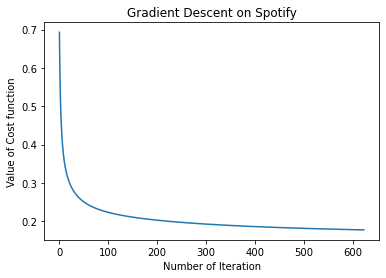

In [ ]:
import matplotlib.pyplot as plt
objective = [i[0][0] for i in spotify_objective_values]
plt.plot(objective)
plt.xlabel('Number of Iteration')
plt.ylabel('Value of Cost function')
plt.title('Gradient Descent on Spotify')

Test your results with the following unit tests. Correct value of the hyperparameter is awarded **1 mark** as well as the right classification accuracy for training set. In the next hidden cell your model would be tested against the training data. The correct result is awarded **2 marks**.

In [ ]:
np.testing.assert_almost_equal(spotify_optimal_regularisation_parameter, 0.03)

In [ ]:
np.testing.assert_almost_equal(spotify_classification_accuracy, 0.9266666)

In [ ]:
### HIDDEN TEST (running ridge binary logistic regression on a training set)

### BEGIN HIDDEN TEST
spotify_testing_true_labels = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,\
                                        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,\
                                        0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]).reshape(-1,1)
spotify_testing_data_matrix = linear_regression_data(
    spotify_testing_data_input)
spotify_testing_regression_values = linear_model_function(
    spotify_testing_data_matrix, spotify_optimal_weights)
spotify_testing_predicted_labels = binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_testing_regression_values))
np.testing.assert_almost_equal(classification_accuracy(true_labels=spotify_testing_true_labels,\
                                                         recovered_labels=spotify_testing_predicted_labels), 42/45)
### END HIDDEN TEST

## Problem 2: Music genre classification
This concludes the binary classification part of the final assessment. We now move on to multinomial logistic regression for multi-class classfication problems. We later apply this to another sound classification problem, namely to a classification of music by genres.

### Question 2a [7 marks]
As in the first exercise, implement the softmax function $\mathtt{softmax\_function}$ as defined in the lectures. The function takes the NumPy array argument as its main argument, but also has an optional *axis* argument to determine across which array-dimension you apply the softmax operation. If this argument is not specified (or set to None), then the softmax operation is applied to the entire array. Make sure your function works at least for NumPy arrays *argument* with arbitrary numerical values and dimension one or two.

In [ ]:
def softmax_function(argument, axis=None):
    # YOUR CODE HERE
    if axis == None:
        output = np.exp(argument - np.max(argument))
        output = output / np.sum(output)
    else:
        output = np.exp(argument - np.expand_dims(np.max(argument, axis), axis))
        output = output / np.expand_dims(np.sum(output, axis), axis)
    return output
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5], [0.3], [-3.7]])), np.array([[0.76528029], \
                                                        [0.23049799], [0.00422172]]))
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5, 3], [0.3, -0.7], [-3.7, 2]]), axis=0), \
                          np.array([[0.76528029, 0.71807976], [0.23049799, 0.01775346], \
                                    [0.00422172, 0.26416678]]))

At the next stage write a function $\mathtt{multinomial\_prediction\_function}$ that turns your predicitons into labels. The function takes the arguments *data_matrix* and *weight_matrix* as inputs and returns a column-vector of labels with values in  $\left\{0, K-1\right\}$ as its output, where $K$ is the number of classes.

In [ ]:
def model_function(data_matrix, weight_matrix):
    return data_matrix @ weight_matrix

In [ ]:
def multinomial_prediction_function(data_matrix, weight_matrix):
    # YOUR CODE HERE
    return np.argmax(model_function(data_matrix, weight_matrix), axis=1)
    raise NotImplementedError()

Next, write a function $\mathtt{one\_hot\_vector\_encoding}$ that converts an NumPy array labels with values in the range of $\left\{0,K-1\right\}$  into so-called one-hot vector encodings. For example, for  $K=3$  and a label vector  $\mathtt{labels} = (2\,0\,1\,2)^\top$, the output of $\mathtt{one\_hot\_vector\_encoding}(\mathit{labels})$ should be a two-dimensional NumPy array of the form:
$$
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [ ]:
def one_hot_vector_encoding(labels):
    # YOUR CODE HERE
    no_of_classes = int(np.max(labels)) + 1
    output = np.zeros((len(labels), no_of_classes))
    output[np.arange(len(labels)), labels] = 1
    return output
    raise NotImplementedError()

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [ ]:
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1, 2, 0, 3])), \
                          np.array([[0,1,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]))
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1,0,1,0])), \
                          np.array([[0,1],[1,0],[0,1],[1,0]]))

Implement the cost function and gradient for the multinomial logistic regression in terms of two functions $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ and $\mathtt{multinomial\_logistic\_regression\_gradient}$. As in the binary classification case, the arguments are the  data matrix *data_matrix* and *weights* that are now named *weight_matrix*. Instead of passing on labels as data_labels as in the binary case, you pass the one hot vector encoding representation *one_hot_vector_encodings* as your third argument. Return the cost function value, respectively the gradient, following the mathematical formulas in the lecture notes.

**Remark**: both functions should include a normalisation prefactor $\frac{1}{s}$.

In [ ]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                                  one_hot_vector_encodings):
    # YOUR CODE HERE
    model_evaluation = model_function(data_matrix, weight_matrix)
    return (np.sum(np.log(np.sum(np.exp(model_evaluation), axis=1)) - np.sum(one_hot_vector_encodings * \
    model_evaluation, axis=1)))/data_matrix.shape[0]
    raise NotImplementedError()

In [ ]:
def multinomial_logistic_regression_gradient(data_matrix, weight_matrix,
                                             one_hot_vector_encodings):
    # YOUR CODE HERE
    model_evaluation = model_function(data_matrix, weight_matrix)
    return (data_matrix.T @ (softmax_function(model_evaluation, axis=1) - one_hot_vector_encodings))/data_matrix.shape[0]

    raise NotImplementedError()

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [ ]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_cost_function(
        test_data_matrix, test_weight_matrix, test_one_hot_vector_encoding),
    0.028611)

In [ ]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_gradient(test_data_matrix,
                                             test_weight_matrix,
                                             test_one_hot_vector_encoding),
    np.array([[2.346197e-02, 2.407665e-12, -2.671137e-02, 3.249397e-03],
              [4.692401e-02, 4.815311e-12, -5.320063e-02, 6.276617e-03],
              [1.876966e-01, 1.926122e-11, -2.129506e-01, 2.525396e-02]]))

We now proceed with loading the data. The GTZAN genre collection dataset was collected in $2000-2001$. It consists of $1000$ audio files each having $30$ seconds duration. There are $10$ classes ($10$ music genres) each containing $100$ audio tracks. Each track is in **.wav** format. It contains audio files of the following 10 genres:

- Blues
- Classical
- Country
- Disco
- Hip-hop
- Jazz
- Metal
- Pop
- Reggae
- Rock

The original raw dataset can be found for example at [GTZAN dataset.](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) Instead of working with raw audio files, we will work with the dataset containing a number, $58$ in total, of audio file features evaluated for each file of the dataset. This file is provided together with this template. In the next cell we read and then normalise the data provided.

In [ ]:
GTZAN_data = np.genfromtxt('GTZAN_features.csv',
                           skip_header=True,
                           dtype=float,
                           delimiter=',',
                           usecols=range(1, 59))
GTZAN_data, _, _ = standardise(GTZAN_data)

genres_dictionary = {b'blues':0,b'classical':1,b'country':2,\
                    b'disco':3,b'hiphop':4,b'jazz':5,\
                     b'metal':6,b'pop':7,b'reggae':8,b'rock':9}
GTZAN_labels = np.genfromtxt('GTZAN_features.csv',
                             skip_header=True,
                             dtype=str,
                             delimiter=',',
                             usecols=[59],
                             converters={59: lambda x: genres_dictionary[x]})

You are now asked to apply the above to the GTZAN dataset:
- Define a linear regression data matrix corresponding to GTZAN data. Store the matrix as *GTZAN_data_matrix*. Define a one hot vector encoding of GTZAN labels and store the result in as *GTZAN_OHV*;
- Define an objective lambda function $\mathtt{GTZAN\_objective}$ with the argument *weight_matrix* based on the $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *GTZAN_data_matrix*) and *data_labels* (equal to *GTZAN_OHV*). Repeat the same exercise to create a function $\mathtt{GTZAN\_gradient}$ based on $\mathtt{multinomial\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero matrix of appropriate dimensions and store it as *GTZAN_initial_weights*;
- Define the step-size of the gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Store it as *GTZAN_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-3*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *GTZAN_optimal_weights*, *GTZAN_objective_values*.

In [ ]:
# YOUR CODE HERE
GTZAN_data_matrix = linear_regression_data(GTZAN_data)
GTZAN_OHV = one_hot_vector_encoding(GTZAN_labels)
size = GTZAN_data_matrix.shape[1]
num_obs = GTZAN_data_matrix.shape[0]
clas = GTZAN_OHV.shape[1]
GTZAN_initial_weights = np.zeros((size,10))

objective = lambda x: multinomial_logistic_regression_cost_function(GTZAN_data_matrix, x, GTZAN_OHV)

gradient = lambda x: multinomial_logistic_regression_gradient(GTZAN_data_matrix, x, GTZAN_OHV)

step_size = (3.9*num_obs)/np.linalg.norm(GTZAN_data_matrix)**2


GTZAN_optimal_weights, GTZAN_objective_values = gradient_descent_v2(objective, gradient, GTZAN_initial_weights, \
                    step_size, no_of_iterations=1000, print_output=100, tolerance=1e-3)
# raise NotImplementedError()

The objective function is:  2.201403804803198
The objective function is:  1.071740537705951
The objective function is:  0.9087593054593581
The objective function is:  0.82313795933349
The objective function is:  0.7674397868461165
The objective function is:  0.7272191278356152
The objective function is:  0.6962696126105598
The objective function is:  0.6714116464962456
The objective function is:  0.6508219863668971
The objective function is:  0.6333676186731662
The objective function is:  0.6183005242309805


### NOTICE!!!
The value of objective function and the norms of optimal parameters are quite close that they are the same in the first two digits

Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

In [ ]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_optimal_weights),
                               6.581158794776621)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 6.5865415539496635
 DESIRED: 6.581158794776621

In [ ]:
np.testing.assert_almost_equal(GTZAN_objective_values[-1], 0.6184412193103139)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 0.618160014942793
 DESIRED: 0.6184412193103139

In [ ]:
GTZAN_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, \
                                                         GTZAN_optimal_weights)
GTZAN_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_classification_accuracy))

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.


In [ ]:
np.testing.assert_almost_equal(GTZAN_classification_accuracy, 0.819)

### Question 2b [7 marks]
As a final exercise before you are left to continue with the main part of your project of classifying
spoken digits, implement a modification of the multinomial logistic regression problem that
contains a positive multiple of the one-norm of the weight matrix as regularisation term, and
approximate a solution numerically with the proximal gradient descent method as introduced in
the lectures. 

Begin by completing the following three functions. 
- The function $\mathtt{soft\_thresholding}$ takes the
two arguments *argument* and *threshold* and returns the solution of the soft-thresholding operation
applied to *argument* with threshold *threshold*.
- The function $\mathtt{lasso\_logistic\_regression\_cost\_function}$ is supposed to implement the multinomial
logistic regression loss with additional one-norm regularisation of weights for data
matrix *data_matrix*, weight matrix *weight_matrix*, the one hot vector encoding of labels 
*one_hot_vector_encodings* and the regularisation parameter *regularisation_parameter*.
- The function $\mathtt{proximal\_gradient\_descent}$ takes the same arguments as the function $\mathtt{gradient\_descent}$, with additional argument $\mathtt{proximal\_map}$ in order to specify the proximal map to be used.

In [ ]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)
    raise NotImplementedError()

In [ ]:
def lasso_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings,
                                            regularisation_parameter):
    # YOUR CODE HERE
    model_evaluation = model_function(data_matrix, weight_matrix)
    return (np.sum(np.log(np.sum(np.exp(model_evaluation), axis=1)) - np.sum(one_hot_vector_encodings * \
    model_evaluation, axis=1)))/data_matrix.shape[0] + regularisation_parameter * np.sum(np.abs(weight_matrix))
    raise NotImplementedError()

In [ ]:
def proximal_gradient_descent(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=1000,
                              print_output=100):
    # YOUR CODE HERE
    objective_values = []
    weights = initial_weights
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights = proximal_map(weights - step_size * gradient(weights))
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
            m=no_of_iterations, o=objective_values[counter]))
            print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
            m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values
    raise NotImplementedError()

Now test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [ ]:
test_weight_matrix = np.array([[1, 2], [3, -4]])
np.testing.assert_array_almost_equal(soft_thresholding(test_weight_matrix, 2),
                                     np.array([[0, 0], [1, -2]]))

In [ ]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
test_regularisation_parameter = 0.1
np.testing.assert_almost_equal(
    lasso_logistic_regression_cost_function(test_data_matrix,
                                            test_weight_matrix,
                                            test_one_hot_vector_encoding,
                                            test_regularisation_parameter),
    2.9286110286783553)

In the next cell, define a suitable objective function *GTZAN_LASSO_objective* and a suitable gradient function *GTZAN_LASSO_gradient*, both with argument *weight_matrix* and fixed *data_matrix* (equal to *GTZAN_data_matrix*) and *one_hot_vector_encodings* (equal to *GTZAN_OHV*) from the GTZAN dataset that you have used before, as well as a suitable proximal map function *GTZAN_proximal_map* with correctly chosen threshold. The threshold should be equal to the regularisation parameter multiplied by the gradient descent step-size. Take the step size equal to 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Take the regularisation parameter equal to
$$
\alpha = 1e-4.
$$

In [ ]:
LASSO_regularisation_parameter = 1e-4
# YOUR CODE HERE
GTZAN_data_matrix = linear_regression_data(GTZAN_data)
GTZAN_OHV = one_hot_vector_encoding(GTZAN_labels)
size = GTZAN_data_matrix.shape[1]
num_obs = GTZAN_data_matrix.shape[0]
clas = GTZAN_OHV.shape[1]
GTZAN_initial_weights = np.zeros((size,10))

objective = lambda x: lasso_logistic_regression_cost_function(GTZAN_data_matrix, x, GTZAN_OHV, LASSO_regularisation_parameter)

gradient = lambda x: multinomial_logistic_regression_gradient(GTZAN_data_matrix, x, GTZAN_OHV) + LASSO_regularisation_parameter*np.sign(x)

step_size = (3.9*num_obs)/np.linalg.norm(GTZAN_data_matrix)**2


GTZAN_LASSO_optimal_weights, GTZAN_LASSO_objective_values = gradient_descent_v2(objective, gradient, GTZAN_initial_weights, \
                    step_size, no_of_iterations=1000, print_output=100, tolerance=1e-3)
# raise NotImplementedError()

The objective function is:  2.201560029228825
The objective function is:  1.077613280524218
The objective function is:  0.9166114986497832
The objective function is:  0.832418458946318
The objective function is:  0.7778447533131677
The objective function is:  0.7385678832931618
The objective function is:  0.7084477593194743
The objective function is:  0.6843253257035437
The objective function is:  0.6644204493861986
The objective function is:  0.6476081891611024
The objective function is:  0.6331295210078072


Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

### NOTICE!!!
The value of objective function and the norms of optimal parameters are quite close that they are the same in the first two digits

In [ ]:
np.testing.assert_almost_equal(GTZAN_LASSO_objective_values[-1],
                               0.6332662161567008)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 0.6329946572251856
 DESIRED: 0.6332662161567008

In [ ]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_LASSO_optimal_weights),
                               6.521161728885989)

AssertionError: 
Arrays are not almost equal to 7 decimals
 ACTUAL: 6.526454014082769
 DESIRED: 6.521161728885989

In [ ]:
# YOUR CODE HERE
GTZAN_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, \
                                                         GTZAN_LASSO_optimal_weights)
GTZAN_LASSO_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_classification_accuracy))
# raise NotImplementedError()

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.


The correct classification accuracy is awarded **3 marks**.

In [ ]:
### HIDDEN TEST
### BEGIN HIDDEN TEST
np.testing.assert_array_almost_equal(GTZAN_LASSO_classification_accuracy,
                                     0.819)
### END HIDDEN TEST

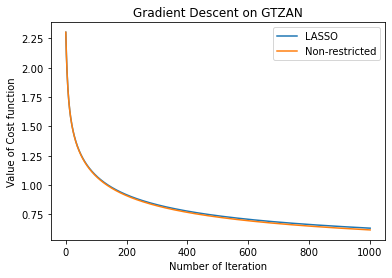

In [ ]:
import matplotlib.pyplot as plt
objective = [i for i in GTZAN_LASSO_objective_values]
plt.plot(objective, label='LASSO')
objective = [i for i in GTZAN_objective_values]
plt.plot(objective, label = 'Non-restricted')
plt.xlabel('Number of Iteration')
plt.ylabel('Value of Cost function')
plt.title('Gradient Descent on GTZAN')
plt.legend()

## Problem 3: Spoken digit classification

This completes the first part of the assessment. From now on, you can use all concepts that you
have learned throughout this module in order to obtain a classifier that can determine which digit
is heard in an audio file. While you are allowed to use different libraries for visualisation/audio files manipulations purposes, you can only use NumPy to program your classifier; tools from libraries such as **SciPy/SciKit-learn/Keras/PyTorch etc. are not allowed**. However, you may wish to use such libraries as **Librosa, python_speech_features**, etc for audio files manipulation. Please note that your classfier will be tested and compared with classifiers from other students. Experimenting with differnt model approaches, regularisation models & parameters and hyperparameter-tuning strategies such as cross validation is therefore highly recommended.

**The dataset structure**: the dataset consists of recordings of spoken digits in **.wav** files at $8$kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends. There are $6$ different speakers who pronounce each digit from $0$ to $9$ for $50$ times. Each audio file has a name of the form $\left\{digit\right\}\_\left\{speaker\,\,name\right\}\_\left\{attempt\,\,number\right\}.wav$. The data is split into training and validation sets with the ratio $80:20$.

There are many ways of representing/visualising the audio data and here in the project we will work with a spectral characteristic known as mel-frequency cepstral coefficients (MFCC) (see [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) for details). As we will see later this can be treated as an pixel image.

We begin by loading the Audio MNIST training dataset that is taken from this [source](https://github.com/Jakobovski/free-spoken-digit-dataset):

In [ ]:
audio_mnist_training_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_mfccs.txt')
audio_mnist_training_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_labels.txt').reshape(-1, 1)

**Remark:** Please note that the corresponding data folder contains two types of data:
- raw audio files (folder Audio)
- audio files Mel-frequency cepstral coefficients (folder MFCC) saved in txt file

In the above we use Mel-frequency cepstral coefficients as the data representation of audio. You are allowed to use alternative representations if you wish. If you do so, please comment in your report on why have you selected another model and what have you achieved by doing that.

Below we take a random element of a training data and demonstrate how the MFCC can be visualised.

The Audio MNIST training set contains 2400 samples with 900 MFC coefficients each.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

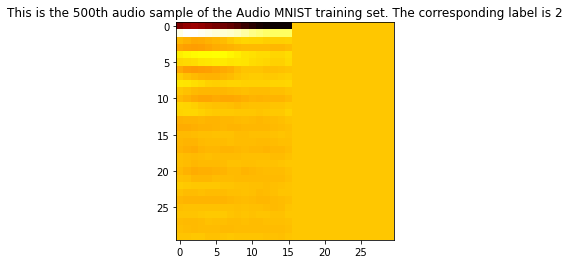

In [ ]:
print("The Audio MNIST training set contains {s} samples with {p} MFC coefficients each.".format(s = audio_mnist_training_mfccs.shape[0], \
        p = audio_mnist_training_mfccs.shape[1]))

item_number = np.random.randint(low=0, high=2400)

plt.imshow(audio_mnist_training_mfccs[item_number].reshape(30, 30), cmap='hot')
plt.title("This is the {n}th audio sample of the Audio MNIST training set. The corresponding label is {l}".format( \
            n= item_number, l=int(audio_mnist_training_labels[item_number][0])))
plt.tight_layout

Use the following space to write your codes. It should be possible to reproduce results that are shown in your report with the codes that are described here. You can outsource functions into separate files if you find that this tidies up your notebook. Any additional libraries that you want to use (e.g. for visualisations etc.) can be loaded here.

In [ ]:
# Your codes here. Please feel free to create more cells etc.

In [ ]:
Aumnist_data_matrix = linear_regression_data(audio_mnist_training_mfccs)
Aumnist_OHV = one_hot_vector_encoding(audio_mnist_training_labels.T[0].astype('int32'))
size = Aumnist_data_matrix.shape[1]
num_obs = Aumnist_data_matrix.shape[0]
clas = Aumnist_OHV.shape[1]
# Aumnist_initial_weights = Aumnist_LASSO_optimal_weights
Aumnist_initial_weights = np.zeros((size,clas))

objective = lambda x: lasso_logistic_regression_cost_function(Aumnist_data_matrix, x, Aumnist_OHV, \
                                                              LASSO_regularisation_parameter)

gradient = lambda x: multinomial_logistic_regression_gradient(Aumnist_data_matrix, x, Aumnist_OHV)+ \
LASSO_regularisation_parameter*np.sign(x)

# step_size = 0.0001
step_size = (3.9*num_obs)/np.linalg.norm(Aumnist_data_matrix)**2

Aumnist_LASSO_optimal_weights, Aumnist_LASSO_objective_values = gradient_descent_v2(objective, gradient, \
                                                                                    Aumnist_initial_weights, \
                                                                                    step_size, no_of_iterations=30000,\
                                                                                    print_output=5000, tolerance=1e-3)

The objective function is:  2.296259659001611
The objective function is:  0.65559552688689
The objective function is:  0.4584729357938119
The objective function is:  0.3684966110209201
The objective function is:  0.31426356767359226
The objective function is:  0.27703906183087473
The objective function is:  0.24948059859789326


Specify the code for your best data model (linear, polynomial or else) applied to your best weights
and assign the result to the output of the function $\mathtt{MNIST\_model\_function}$. The data model has to be created from the argument *inputs*, which is a two-dimensional array where the first dimension equals the number of samples and the second dimension the dimension of the data (900 in case of Audio MNIST). If, for example, your model is a linear basis model applied to a weight matrix *best_weight_matrix*, then your code could look like:

```
def MNIST_model_function(inputs):
    return linear_regression_data(inputs) @ best_weight_matrix
```


In [ ]:
Aumnist_optimal_weights = Aumnist_LASSO_optimal_weights

In [ ]:
'''Specify your model function. The output has to be a two-dimensional array of size sx1
You are not allowed to include additional input arguments.'''
def MNIST_model_function(inputs):
    # YOUR CODE HERE
    labels = multinomial_prediction_function(linear_regression_data(inputs), Aumnist_optimal_weights)
    return labels
    raise NotImplementedError()

The code in the next cell will then evaluate the classification performance of your best classifier
when applied to hidden data that is similar (but different) to the MNIST training dataset.

In [ ]:
audio_mnist_test_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Testing/testing_mfccs.txt')
audio_mnist_test_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Testing/testing_labels.txt').reshape(-1, 1)

In [ ]:
# YOUR CODE HERE
Aumnist_recovered_labels = MNIST_model_function(audio_mnist_test_mfccs)
Aumnist_classification_accuracy = classification_accuracy(
    audio_mnist_test_labels, Aumnist_recovered_labels)
print("The classification accuracy for the Audio MNIST dataset is {p} %.".format(
    p=100 * Aumnist_classification_accuracy))

The classification accuracy for the Audio MNIST dataset is 91.5 %.


In [ ]:
# With standardrization
audio_mnist_training_mfccs, _, _ = standardise(audio_mnist_training_mfccs)

Aumnist_data_matrix = linear_regression_data(audio_mnist_training_mfccs)
Aumnist_OHV = one_hot_vector_encoding(audio_mnist_training_labels.T[0].astype('int32'))
size = Aumnist_data_matrix.shape[1]
num_obs = Aumnist_data_matrix.shape[0]
clas = Aumnist_OHV.shape[1]
# Aumnist_initial_weights = Aumnist_LASSO_optimal_weights
Aumnist_initial_weights = np.zeros((size,clas))

objective = lambda x: lasso_logistic_regression_cost_function(Aumnist_data_matrix, x, Aumnist_OHV, LASSO_regularisation_parameter)

gradient = lambda x: multinomial_logistic_regression_gradient(Aumnist_data_matrix, x, Aumnist_OHV) + LASSO_regularisation_parameter*np.sign(x)

# step_size = 0.0001
step_size = (3.9*num_obs)/np.linalg.norm(Aumnist_data_matrix)**2

Std_Aumnist_LASSO_optimal_weights, Std_Aumnist_LASSO_objective_values = gradient_descent_v2(objective, gradient, Aumnist_initial_weights, \
                    step_size, no_of_iterations=5000, print_output=500, tolerance=1e-3)

The objective function is:  2.2624728320298857
The objective function is:  0.30970008542580113
The objective function is:  0.20551925147368078
The objective function is:  0.16342290072560364
The objective function is:  0.1395743641472358
The objective function is:  0.1239293885762906
The objective function is:  0.11277438271096656
The objective function is:  0.10437326330374277
The objective function is:  0.09779279143866339
The objective function is:  0.09248147627208342
The objective function is:  0.08809423448446967


In [ ]:
# YOUR CODE HERE
Aumnist_optimal_weights = Std_Aumnist_LASSO_optimal_weights

audio_mnist_test_mfccs, _, _ = standardise(audio_mnist_test_mfccs)
Aumnist_recovered_labels = MNIST_model_function(audio_mnist_test_mfccs)
Aumnist_classification_accuracy = classification_accuracy(
    audio_mnist_test_labels, Aumnist_recovered_labels)
print("The classification accuracy for the Audio MNIST dataset is {p} %.".format(
    p=100 * Aumnist_classification_accuracy))

The classification accuracy for the Audio MNIST dataset is 95.16666666666667 %.


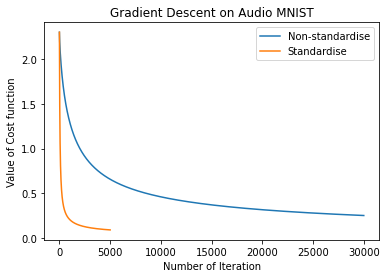

In [ ]:
import matplotlib.pyplot as plt
objective = [i for i in Aumnist_LASSO_objective_values]
plt.plot(objective,label='Non-standardise')
objective = [i for i in Std_Aumnist_LASSO_objective_values]
plt.plot(objective,label='Standardise')

plt.xlabel('Number of Iteration')
plt.ylabel('Value of Cost function')
plt.title('Gradient Descent on Audio MNIST')
plt.legend()

### Solved by Neural Net

In [ ]:
def nn_forward_propagation(data_input, weight_matrix):
    no_of_layers = weight_matrix.shape[0]
    nn_state = np.empty(2*no_of_layers+1, dtype = np.ndarray)
    nn_state[0] = data_input
    for l in range(no_of_layers):
        nn_state[2*l+1] = model_function(linear_regression_data(nn_state[2*l]), weight_matrix[l])
        nn_state[2*l+2] = softmax_function(nn_state[2*l+1], axis = 1)
    return nn_state

In [ ]:
def nn_back_propagation(data_input, weight_matrix, one_hot_vector_encodings):
    nn_state = nn_forward_propagation(data_input, weight_matrix)
    no_of_layers = weight_matrix.shape[0]
    full_X_gradient = np.empty(no_of_layers, dtype = np.ndarray)
    full_W_gradient = np.empty(no_of_layers, dtype = np.ndarray)
    full_Z_gradient = np.empty(no_of_layers, dtype = np.ndarray)
    full_Z_gradient[no_of_layers-1] = nn_state[-1] - one_hot_vector_encodings
    for layer in range(no_of_layers,0,-1):
        full_W_gradient[layer-1] = linear_regression_data(nn_state[2*layer-2]).T @ full_Z_gradient[layer-1]
        full_X_gradient[layer-1] = full_Z_gradient[layer-1] @ (np.delete(weight_matrix[layer-1],(0), axis = 0)).T
        if layer != 1:
            product_matrix = full_X_gradient[layer-1]*nn_state[2*layer-2]
            sigma_matrix = np.sum(product_matrix,axis=1)
            full_Z_gradient[layer-2] = product_matrix - (nn_state[2*layer-2].T*sigma_matrix).T
    return full_W_gradient

In [ ]:
def nn_cost_function(data_input, weight_matrix, one_hot_vector_encodings):
    nn_state = nn_forward_propagation(data_input, weight_matrix)
    return np.sum(np.log(np.sum(np.exp(nn_state[-2]), axis=1))\
    - np.sum(one_hot_vector_encodings*nn_state[-2], axis=1))

In [ ]:
def nn_prediction_function(data_input, weight_matrix):
    nn_state = nn_forward_propagation(data_input, weight_matrix)
    return np.argmax(nn_state[-1], axis=1)

In [ ]:
### BEGIN SOLUTION
Audio_data_matrix = Aumnist_data_matrix
no_of_layers = 2
num_obs = Audio_data_matrix.shape[0]


Audio_nn_objective = lambda weight_matrix: nn_cost_function(Audio_data_matrix,weight_matrix,Aumnist_OHV)/num_obs
Audio_nn_gradient = lambda weight_matrix: nn_back_propagation(Audio_data_matrix,weight_matrix, Aumnist_OHV)/num_obs
Audio_nn_step = 3.9/(np.linalg.norm(Audio_data_matrix, 2) ** 2)
Audio_nn_initial_weight_matrix = np.empty(no_of_layers, dtype = np.ndarray)

for weight_pos in range(no_of_layers - 1):
    Audio_nn_initial_weight_matrix[weight_pos] = np.zeros((Audio_data_matrix.shape[1]+1,Audio_data_matrix.shape[1]))
Audio_nn_initial_weight_matrix[no_of_layers - 1] = np.zeros((Audio_data_matrix.shape[1]+1,Aumnist_OHV.shape[1]))
Audio_nn_optimal_weights, _ = gradient_descent(Audio_nn_objective, Audio_nn_gradient, Audio_nn_initial_weight_matrix, \
step_size=Audio_nn_step, \
no_of_iterations=1000, print_output=10)

In [ ]:
print("The two layered neural network successfully classified {acc:2.2f} % of data".format\
      (acc = 100 * wine_nn_accuracy_rate))

This completes the MTH786 coding project requirements. Please do not forget to write a detailed report on your findings (at most 8 pages) with  $\LaTeX$  and your favourite editor. If no editor is at hand, please feel free to use online editors such as [Overleaf](https://www.overleaf.com/).